In [36]:
#implementing mini batch gradient descent method
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv("/Users/kkutumba/Downloads/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [38]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [39]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [40]:
def Mini_batch_gradient_descent(X, y_true, epochs=100,batch_size=5, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    if batch_size>total_samples:
        batch_size = total_samples
    cost_list = []
    epoch_list = []
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        sample_X = X[random_indices]
        sample_y = y_true[random_indices]

        for j in range(0, total_samples, batch_size):
            Xj = sample_X[j:j+batch_size]
            yj = sample_y[j:j+batch_size]
            y_predicted = np.dot(w, sample_X.T)+b
        
            w_grad = -(2/total_samples)*(sample_X.T.dot(sample_y-y_predicted))
            b_grad = -(2/total_samples)*np.mean(sample_y-y_predicted)
        
            w = w-learning_rate * w_grad
            b = b-learning_rate * b_grad
        
            cost = np.square(sample_y-y_predicted)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = Mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),epochs = 120, batch_size = 5)
w, b, cost
        
        


(array([0.61151923, 0.43949717]),
 -0.05451589956757325,
 array([3.52826495e-03, 1.94605463e-02, 6.08738105e-03, 6.46605448e-03,
        8.22627652e-06, 1.43137481e-06, 3.64786484e-03, 1.29779290e-02,
        3.25025734e-03, 1.18377687e-02, 1.61052292e-02, 9.96109688e-07,
        1.19330783e-05, 7.91619024e-03, 2.96951787e-03, 3.33707847e-05,
        3.86207739e-03, 1.60680457e-03, 2.82277418e-03, 1.12942006e-02]))

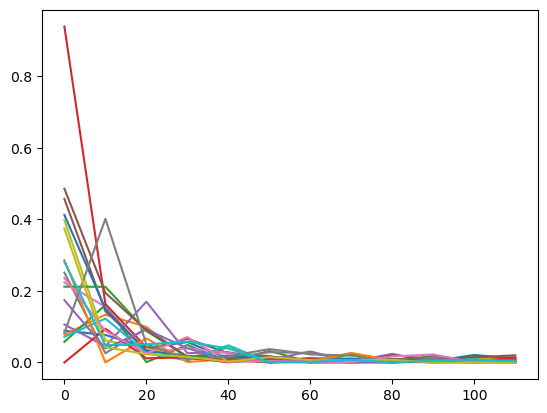

In [41]:
plt.plot(epoch_list,cost_list)